# Librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import pandas as pd
import numpy as np

# Inspect the dataset

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df_solution = df.pivot_table(index=['ever_married', 'stroke'], aggfunc='size')

In [5]:
df_solution

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64

Controlliamo se ci sono missing value

In [6]:
# inspect the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only the column "bmi" has nan value.

We will fill it with the mean

In [7]:
# fill the nan value with the mean
df['bmi'] = df['bmi'].fillna(round(df.bmi.mean(),1))

# Some correlation

Supponiamo di star lavorando con un ospedale e vogliamo predirre se i pazienti avranno un ictus, e abbiamo un dataset dei pazienti li dentro e vogliamo vedere se il dataset è abbastanza buono per predirre l'icuts si o no, secondo delle linee guida date dai medici:

```
https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

https://www.humanitas.it/malattie/ictus-cerebrale/

```
Infatti il 75% dei casi di ICTUS colpisce le persone con più di 65 anni.

L’incidenza è proporzionale all’età della popolazione: è bassa fino a 40-45 anni, poi aumenta gradualmente per impennarsi dopo i 70 anni.

Tra i fattori di rischio non modificabili:

età;
sesso;

malattie cardiache

obesità

ipertensione arteriosa

In [8]:
# Take only the dataset with stroke = 1
dfStrocke = df[df['stroke'] == 1].copy()

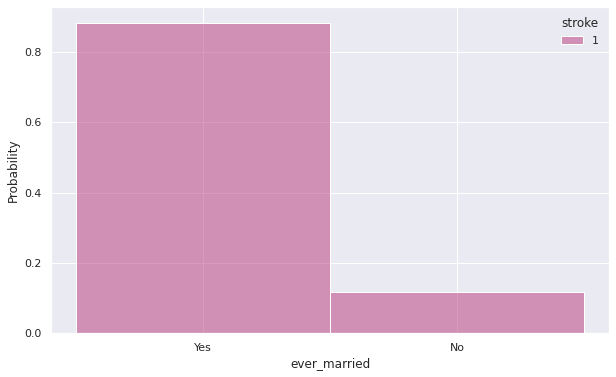

In [9]:
# set size of sbn figure 
sns.set(rc = {'figure.figsize':(10,6)})
sns.histplot(data = dfStrocke, x='ever_married', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

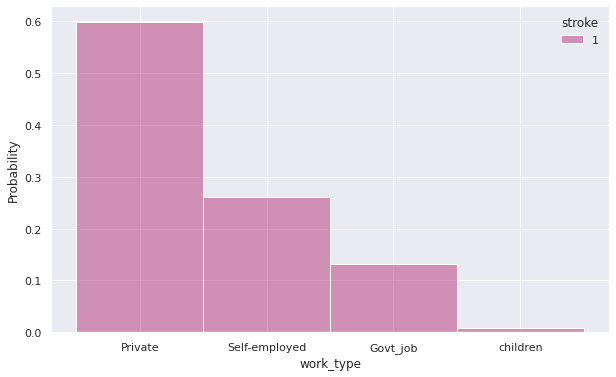

In [10]:
sns.histplot(data = dfStrocke, x='work_type', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

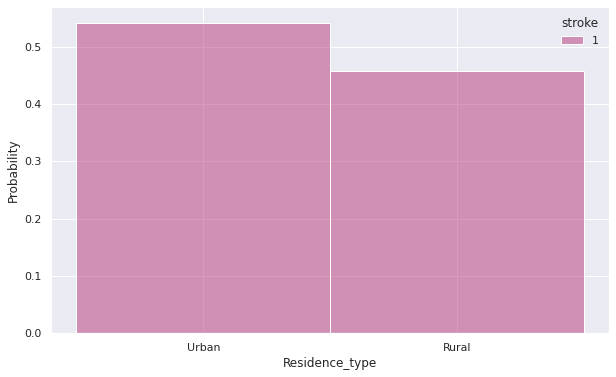

In [11]:
sns.histplot(data = dfStrocke, x='Residence_type', hue='stroke', bins = 2, stat = 'probability', palette = 'magma')
plt.show()

inutile

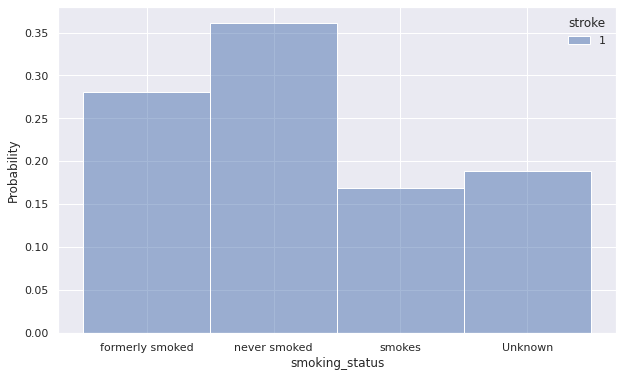

In [12]:
sns.histplot(data = dfStrocke, x='smoking_status', hue='stroke', stat = 'probability')
plt.show()

We can see that the % of pearson with unknown status of smoking is high relately to the number of pearson who had a stroke.

In [13]:
unknownSmoke = round(sum((dfStrocke['smoking_status'] == 'Unknown'))/dfStrocke.shape[0] * 100, 2)
unknownSmoke

18.88

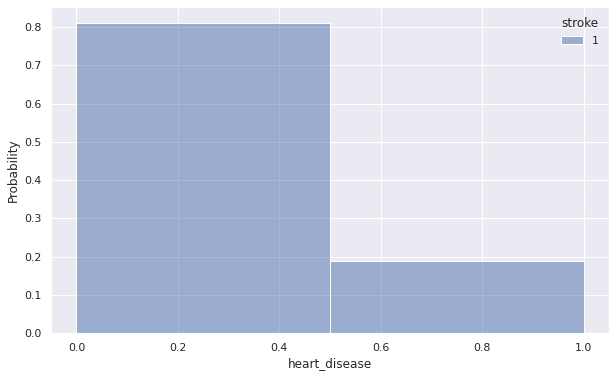

In [14]:
sns.histplot(data = dfStrocke, x='heart_disease', hue='stroke', bins = 2, stat = 'probability')
plt.show()

Il dataset rispecchia i dati dai siti mediciosi?
si/no spiega

### ScatterPlot

In [15]:
print('stroke: ',len(df[df['stroke']==1]))
print('no stroke: ',len(df[df['stroke']==0]))

stroke:  249
no stroke:  4861


In [16]:
stroke1 = df[df['stroke'] == 1].head(240).copy()
stroke0 = df[df['stroke'] == 0].head(200).copy()
strokee = pd.concat([stroke1, stroke0])

In [17]:
features = (strokee[['age', 'avg_glucose_level', 'bmi', 'stroke']].T).copy()
features = np.array(features, dtype = np.float64)

In [18]:
print(min(features[1]), max(features[1]))

55.39 271.74


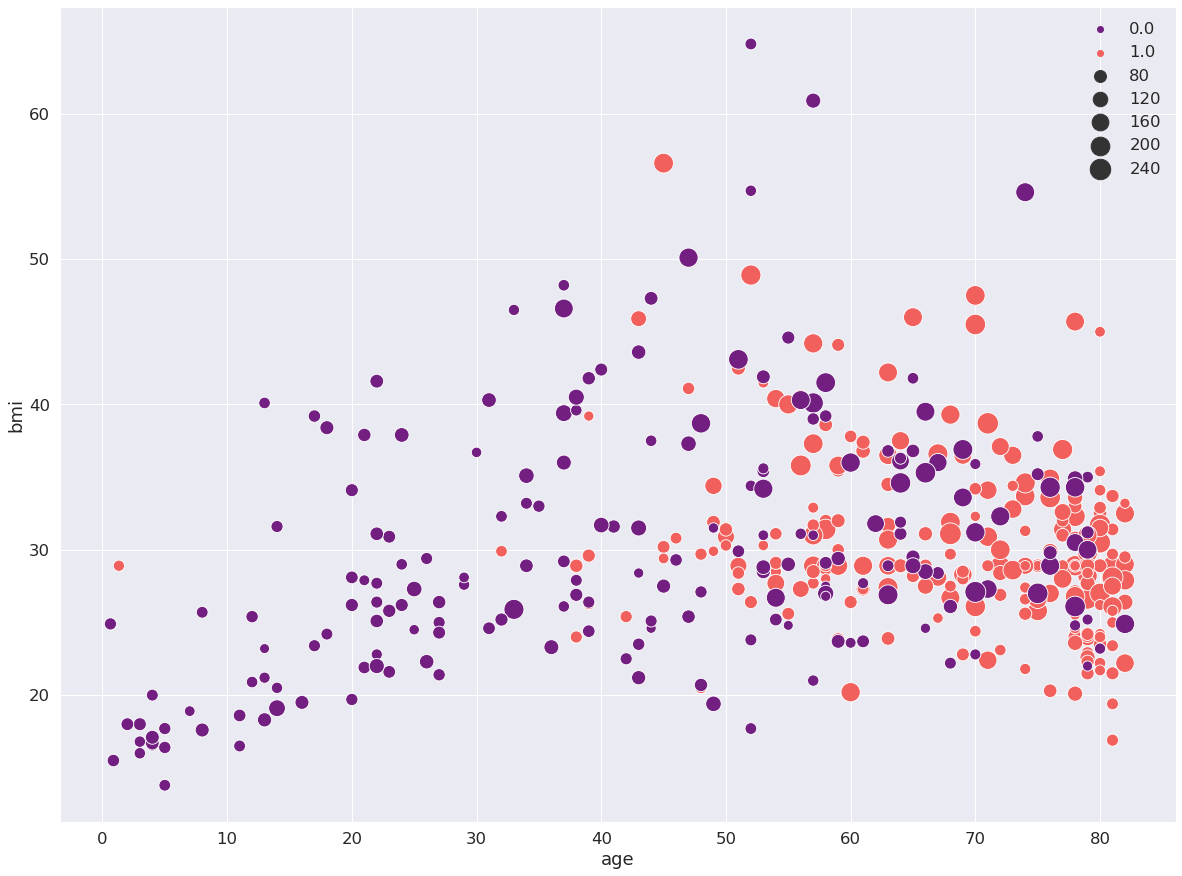

In [49]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = features[0], y = features[2],
             size = features[1], sizes = (100,472), hue = features[3], palette = 'magma')
plt.xlabel('age')
plt.ylabel('bmi');

AGE: >40/50 

BMI: >20

Glucosio alto nei vecchi e bmi alto e chi ha ictus

# Standardize my data and fixing it

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df[cols])

df_norm = df.copy()
df_norm[cols] = pd.DataFrame(norm)

In [22]:
df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001199,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.000844,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.468543,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.715384,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.635746,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.000844,never smoked,0
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.442915,never smoked,0
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.221702,never smoked,0
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.427880,formerly smoked,0


Residence type, ever_married and gender are one hot encoder 0/1, no need to double the columns

In [23]:
# GENDER: F/M --> 1/0
df_norm.drop(df_norm.loc[df['gender'] =='Other'].index, inplace=True)
df_norm["gender"] = df_norm["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
df_norm["ever_married"] = df_norm["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
df_norm["Residence_type"] = df_norm["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [24]:
df_norm.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051434,0,1,1,Private,1,2.706375,1.001199,formerly smoked,1
1,51676,1,0.786070,0,0,1,Self-employed,0,2.121559,0.000844,never smoked,1
2,31112,0,1.626390,0,1,1,Private,0,-0.005028,0.468543,never smoked,1
3,60182,1,0.255342,0,0,1,Private,1,1.437358,0.715384,smokes,1
4,1665,1,1.582163,1,0,1,Self-employed,0,1.501184,-0.635746,never smoked,1


# Train-Test split

Dropping columns and separate Design matrix from target

In [25]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [26]:
from sklearn.model_selection import train_test_split
# split the data with 60% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size = 0.6)

In [27]:
# transform the dataframe in dictionary to perform feature extraction
X_train = X_train.to_dict('records')
X_test = X_test.to_dict('records')

In [28]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False, dtype = float)

In [29]:
X_train = v.fit_transform(X_train)
X_test = v.transform(X_test)

In [30]:
pd.DataFrame(X_train, columns = v.get_feature_names_out() )

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status=Unknown,smoking_status=formerly smoked,smoking_status=never smoked,smoking_status=smokes,work_type=Govt_job,work_type=Never_worked,work_type=Private,work_type=Self-employed,work_type=children
0,1.0,-1.872879,0.133446,-1.298319,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.520706,2.760705,-0.856603,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.874525,1.508031,-0.596771,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.316798,-0.856193,0.507518,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.184116,1.152459,0.598459,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,1.0,-0.673433,-0.431494,1.261032,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3061,0.0,0.786070,-0.534190,0.130760,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3062,0.0,0.034205,-0.252604,-0.064114,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3063,1.0,-0.983025,0.326692,0.104777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# k-neighbors method

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [32]:
model.fit(X_train, y_train)
y_KN = model.predict(X_test)

Compare using confusion-matrix

In [33]:
from sklearn.metrics import confusion_matrix

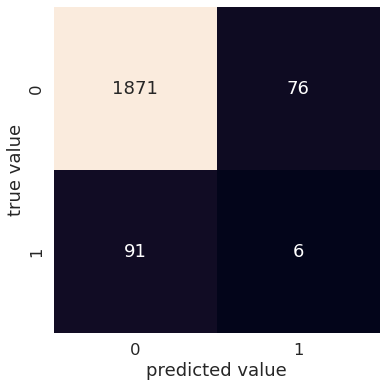

In [34]:
mat = confusion_matrix(y_test, y_KN)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_KN)

0.9182974559686888

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression(random_state=0)

In [38]:
clf.fit(X_train, y_train)
y_LR = clf.predict(X_test)

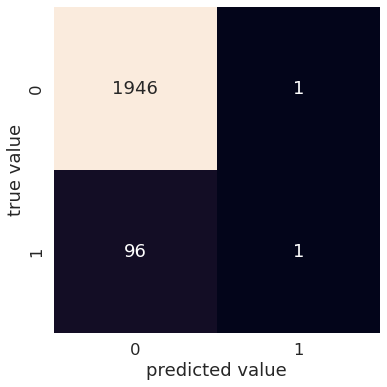

In [39]:
mat = confusion_matrix(y_test, y_LR)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [40]:
accuracy_score(y_test, y_LR)

0.9525440313111546

### Boundary ?

In [41]:
theta = clf.coef_.shape

In [42]:
x1_vec = np.linspace(-3-1,4+1,200);
x2_vec = np.linspace(-4-1,4+1,200);

In [43]:
x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)   # meshgrid

In [44]:
popt, pcov = curve_fit(arbitrary_poly, x1_vec, ydata, p0=[1]*(d+1))

NameError: name 'curve_fit' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20, include_bias=False)
XX = poly.fit(xx)


In [ ]:
xx = np.column_stack((x1_vec, x2_vec))

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = dftmp, fit_reg = False, height=6);
plt.contour(x1_vec, x2_vec, XX, colors="red", levels=[0])
plt.show()

# Naive Bayes

Dobbiamo trasformare le variabili continue in Guassiane(?)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Visualize the data using PCA


In [ ]:
dfplt = df.copy()

# GENDER: F/M --> 1/0
dfplt.drop(dfplt.loc[df['gender'] =='Other'].index, inplace=True)
dfplt["gender"] = dfplt["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
dfplt["ever_married"] = dfplt["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
dfplt["Residence_type"] = dfplt["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [ ]:
Xnot_norm = dfplt.drop(['id', 'stroke'], axis = 1)
Xplt = Xnot_norm.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
X_2D.shape

In [ ]:
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
sum(dfplt['stroke'] == 1)

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

### Standardize dataset PCA plot visualitation

In [ ]:
X.shape

In [ ]:
Xplt = X.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
dfplt = df_norm.copy()
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

Chiedere quale PCA è meglio.